<center>
    <img src="Logo-Olist.png" alt="logo">
</center>

# Analyse de la stabilité des segments au cours du temps

In [1]:
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 80)

In [3]:
modele_13 = pd.read_csv('modele_final_13_indic.csv', index_col=[0])

In [4]:
modele_13

,Recency,frequency,monetary,review_mean,proxi_city,seller_env,order_status,niveau_prix,saison,retard_livraison,produit_different,cust_env,top_payment,cluster_kmean,cluster_pred,cah_cluster,kpro_cluster
53115,0.083333,0.000000,0.009518,5.0,0,2,5,3,3,0,1,1,4,2,80,0,0
86867,0.584770,0.081081,0.053969,5.0,0,2,5,4,3,0,1,2,3,1,99,1,3
109536,0.629310,0.000000,0.003297,4.0,0,2,5,2,2,0,1,2,4,3,46,5,1
21437,0.022989,0.000000,0.020458,4.0,0,2,5,4,3,0,1,1,4,2,85,7,0
28487,0.150862,0.000000,0.005070,5.0,0,1,5,2,2,0,1,2,4,3,14,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10986,0.061782,0.000000,0.004246,5.0,0,2,5,2,3,0,1,2,4,1,8,0,5
92364,0.791667,0.000000,0.005339,3.0,0,2,5,2,1,1,1,2,4,5,10,5,5
85670,0.053161,0.000000,0.007161,5.0,1,2,5,3,3,0,1,2,4,4,6,0,5
15385,0.392241,0.000000,0.002125,1.0,0,2,5,1,4,0,1,2,3,0,31,2,2


In [5]:
df_base = pd.read_csv('p5_clean', index_col=[0])

In [6]:
#df = df.sample(n=25000,random_state=0).copy();
df_base = df_base.sample(n=25000, random_state=0).copy()

In [7]:
df5 = df_base[['order_purchase_timestamp', 'customer_unique_id']]
maintenance_modele_13 = pd.concat([modele_13, df5], join='inner', axis=1)
modele_13_cat_col = [4, 5, 6, 7, 8, 9, 10, 11, 12]

In [8]:
maintenance_modele_13

,Recency,frequency,monetary,review_mean,proxi_city,seller_env,order_status,niveau_prix,saison,retard_livraison,produit_different,cust_env,top_payment,cluster_kmean,cluster_pred,cah_cluster,kpro_cluster,order_purchase_timestamp,customer_unique_id
53115,0.083333,0.000000,0.009518,5.0,0,2,5,3,3,0,1,1,4,2,80,0,0,2018-07-02 22:03:59,249bd5d40e52b5e10280890b693bc49b
86867,0.584770,0.081081,0.053969,5.0,0,2,5,4,3,0,1,2,3,1,99,1,3,2017-07-18 09:18:49,0a843a6dd55792323714128564c1541e
109536,0.629310,0.000000,0.003297,4.0,0,2,5,2,2,0,1,2,4,3,46,5,1,2017-06-17 13:35:06,e9a2267d90aba3e5ea9c9fc15bd8d343
21437,0.022989,0.000000,0.020458,4.0,0,2,5,4,3,0,1,1,4,2,85,7,0,2018-08-14 00:25:18,42669722f592114360451dba9cfb6f49
28487,0.150862,0.000000,0.005070,5.0,0,1,5,2,2,0,1,2,4,3,14,0,6,2018-05-16 16:49:38,05ee75f22192fa64ce162fe7459960ef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10986,0.061782,0.000000,0.004246,5.0,0,2,5,2,3,0,1,2,4,1,8,0,5,2018-07-18 00:45:11,32bead9c6b5f3cbbf61929b5367efa59
92364,0.791667,0.000000,0.005339,3.0,0,2,5,2,1,1,1,2,4,5,10,5,5,2017-02-24 13:26:16,c6d948d6f45911943f9800a1a9937005
85670,0.053161,0.000000,0.007161,5.0,1,2,5,3,3,0,1,2,4,4,6,0,5,2018-07-23 21:53:02,8d50f5eadf50201ccdcedfb9e2ac8455
15385,0.392241,0.000000,0.002125,1.0,0,2,5,1,4,0,1,2,3,0,31,2,2,2017-11-29 12:06:14,2d52410f260c83f32886e18a0cecca56


In [9]:
maintenance_modele_13 = maintenance_modele_13.sort_values(
    'order_purchase_timestamp', ascending=True)
maintenance_modele_13['order_purchase_timestamp'] = maintenance_modele_13['order_purchase_timestamp'].astype(
    'datetime64[ns]')
maintenance_modele_13

,Recency,frequency,monetary,review_mean,proxi_city,seller_env,order_status,niveau_prix,saison,retard_livraison,produit_different,cust_env,top_payment,cluster_kmean,cluster_pred,cah_cluster,kpro_cluster,order_purchase_timestamp,customer_unique_id
81631,1.000000,0.000000,0.007270,1.0,1,2,1,3,4,0,1,2,4,4,36,5,2,2016-10-02 22:07:52,0eb1ee9dba87f5b36b4613a65074337c
101421,0.998563,0.000000,0.004060,5.0,0,2,5,2,4,0,1,2,1,1,65,5,4,2016-10-04 09:06:10,cd5a5843d35eebdf90368bf24d4a04cf
111484,0.997126,0.000000,0.007668,1.0,1,2,5,3,4,0,1,2,4,4,36,5,2,2016-10-04 09:59:03,88bc832f104b6dd684a17dbb1b76e778
74407,0.997126,0.000000,0.009878,3.0,0,2,5,3,4,0,1,2,4,1,41,5,2,2016-10-04 13:15:52,5f7e36fb1d42d0b1c408b5b41bc52bb3
92821,0.997126,0.000000,0.014113,1.0,0,2,3,4,4,0,1,2,4,0,19,5,6,2016-10-04 13:38:37,d7afcd4b6f0d645a8efa24bef0b66ca0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110936,0.001437,0.000000,0.018341,5.0,0,2,5,4,3,0,1,2,4,1,42,7,2,2018-08-28 15:58:28,55cfdb1ec3c5bf60d9ccc0d5f276f8a9
32454,0.001437,0.000000,0.002073,4.0,1,2,5,1,3,0,1,2,4,4,82,0,0,2018-08-28 18:58:13,58ffbb506c34ffb731c99595589a4ebe
24000,0.001437,0.081081,0.009473,5.0,1,2,5,1,3,0,2,2,3,4,82,0,0,2018-08-28 19:32:05,fb7e29c65321441231990afc201c1b14
107880,0.000000,0.027027,0.036684,5.0,1,1,5,4,3,0,1,1,4,4,95,1,3,2018-08-29 14:18:23,5c58de6fb80e93396e2f35642666b693


In [10]:
maintenance_modele_13 = maintenance_modele_13.set_index(
    'order_purchase_timestamp')

In [11]:
time_delta = int((maintenance_modele_13.index.max() -
                 maintenance_modele_13.index.min())/np.timedelta64(1, 'M'))
print("La période complète des commandes porte sur {} mois.".format(time_delta))

La période complète des commandes porte sur 22 mois.


In [12]:
periode_ref = maintenance_modele_13['2016-09-04':
                                    '2017-09-04'].set_index('customer_unique_id')
periode_ref = periode_ref.iloc[:, 0:-3]

model_maintenance = KMeans(6, random_state=0)

label_ref = model_maintenance.fit_predict(periode_ref)
result_ref_0 = adjusted_rand_score(label_ref,
                                   label_ref)

In [13]:
# Ajout d'un mois
periode_ref_1 = maintenance_modele_13['2016-09-04':'2017-10-04'].set_index(
    'customer_unique_id')
periode_ref_1 = periode_ref_1.iloc[:, 0:-3]


# Création de modèle et prédictions
model_1 = model_maintenance.fit(periode_ref_1)
label_ref_1 = model_1.predict(periode_ref)
result_ref_1 = adjusted_rand_score(label_ref,
                                   label_ref_1)
# Affichage du score ARI
print("Score ARI période de référence et référence +1 mois :",
      adjusted_rand_score(label_ref,
                          label_ref_1))

Score ARI période de référence et référence +1 mois : 0.99600480967573


In [14]:
# Ajout de 2 mois
periode_ref_2 = maintenance_modele_13['2016-09-04':'2017-11-04'].set_index(
    'customer_unique_id')
periode_ref_2 = periode_ref_2.iloc[:, 0:-3]
periode_ref_2

# Création de modèle et prédictions
model_2 = model_maintenance.fit(periode_ref_2)
label_ref_2 = model_2.predict(periode_ref)
result_ref_2 = adjusted_rand_score(label_ref,
                                   label_ref_2)
# Affichage du score ARI
print("Score ARI période de référence et référence +2 mois :",
      adjusted_rand_score(label_ref,
                          label_ref_2))

Score ARI période de référence et référence +2 mois : 0.5837053699022366


In [15]:
# Ajout de 3 mois
periode_ref_3 = maintenance_modele_13['2016-09-04':'2017-12-04'].set_index(
    'customer_unique_id')
periode_ref_3 = periode_ref_3.iloc[:, 0:-3]
periode_ref_3

# Création de modèle et prédictions
model_3 = model_maintenance.fit(periode_ref_3)
label_ref_3 = model_3.predict(periode_ref)
result_ref_3 = adjusted_rand_score(label_ref,
                                   label_ref_3)
# Affichage du score ARI
print("Score ARI période de référence et référence +3 mois :",
      adjusted_rand_score(label_ref,
                          label_ref_3))

Score ARI période de référence et référence +3 mois : 0.5818267541206268


In [16]:
# Ajout de 4 mois
periode_ref_4 = maintenance_modele_13['2016-09-04':'2018-01-04'].set_index(
    'customer_unique_id')
periode_ref_4 = periode_ref_4.iloc[:, 0:-3]
periode_ref_4

# Création de modèle et prédictions
model_4 = model_maintenance.fit(periode_ref_4)
label_ref_4 = model_4.predict(periode_ref)
result_ref_4 = adjusted_rand_score(label_ref,
                                   label_ref_4)
# Affichage du score ARI
print("Score ARI période de référence et référence +4 mois :",
      adjusted_rand_score(label_ref,
                          label_ref_4))

Score ARI période de référence et référence +4 mois : 0.5823473897803034


In [17]:
# list of strings
ari_liste = [result_ref_0,
             result_ref_1,
             result_ref_2,
             result_ref_3,
             result_ref_4]

df_maintenance = pd.DataFrame(ari_liste, index=['2017-10-04', '2017-11-04', '2017-12-04',
                                                '2018-01-04', '2018-02-04', ],
                              columns=['Ari_score'])
df_maintenance

,Ari_score
2017-10-04,1.000000
2017-11-04,0.996005
2017-12-04,0.583705
2018-01-04,0.581827
2018-02-04,0.582347


In [18]:
df_maintenance = df_maintenance.reset_index()
df_maintenance = df_maintenance.rename(columns={"index": "periode"})
df_maintenance['periode'] = df_maintenance['periode'].astype('datetime64[ns]')

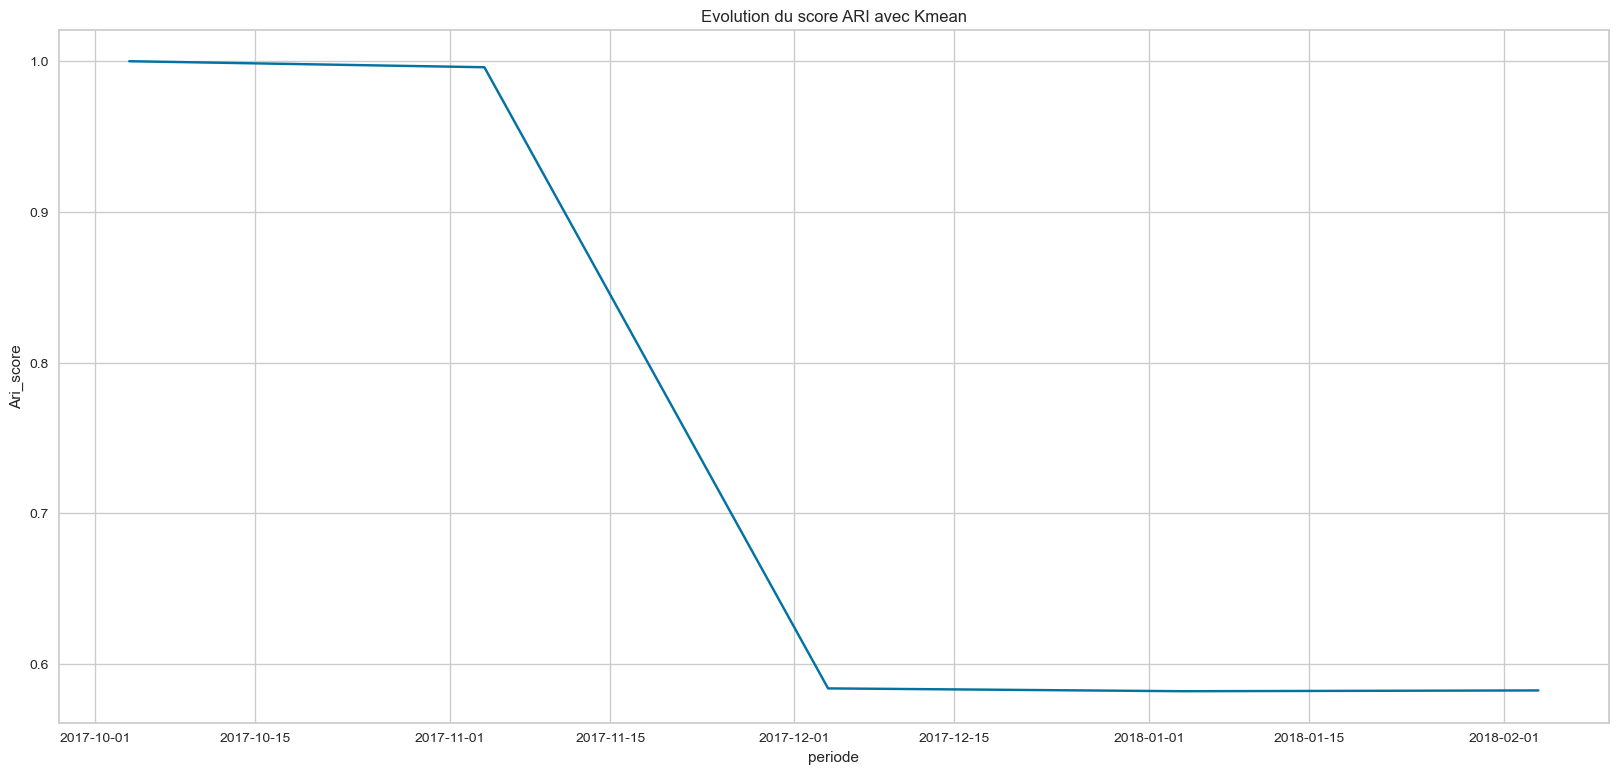

In [19]:
plt.figure(figsize=(20, 9))
sns.lineplot(data=df_maintenance, x='periode', y='Ari_score')
plt.title('Evolution du score ARI avec Kmean')
plt.show()

Le score passe sous 0.75 au bout de 1 mois et demi.

# Maintenance Kprototype

In [20]:
maintenance_modele_13

,Recency,frequency,monetary,review_mean,proxi_city,seller_env,order_status,niveau_prix,saison,retard_livraison,produit_different,cust_env,top_payment,cluster_kmean,cluster_pred,cah_cluster,kpro_cluster,customer_unique_id
order_purchase_timestamp,,,,,,,,,,,,,,,,,,
2016-10-02 22:07:52,1.000000,0.000000,0.007270,1.0,1,2,1,3,4,0,1,2,4,4,36,5,2,0eb1ee9dba87f5b36b4613a65074337c
2016-10-04 09:06:10,0.998563,0.000000,0.004060,5.0,0,2,5,2,4,0,1,2,1,1,65,5,4,cd5a5843d35eebdf90368bf24d4a04cf
2016-10-04 09:59:03,0.997126,0.000000,0.007668,1.0,1,2,5,3,4,0,1,2,4,4,36,5,2,88bc832f104b6dd684a17dbb1b76e778
2016-10-04 13:15:52,0.997126,0.000000,0.009878,3.0,0,2,5,3,4,0,1,2,4,1,41,5,2,5f7e36fb1d42d0b1c408b5b41bc52bb3
2016-10-04 13:38:37,0.997126,0.000000,0.014113,1.0,0,2,3,4,4,0,1,2,4,0,19,5,6,d7afcd4b6f0d645a8efa24bef0b66ca0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-28 15:58:28,0.001437,0.000000,0.018341,5.0,0,2,5,4,3,0,1,2,4,1,42,7,2,55cfdb1ec3c5bf60d9ccc0d5f276f8a9
2018-08-28 18:58:13,0.001437,0.000000,0.002073,4.0,1,2,5,1,3,0,1,2,4,4,82,0,0,58ffbb506c34ffb731c99595589a4ebe
2018-08-28 19:32:05,0.001437,0.081081,0.009473,5.0,1,2,5,1,3,0,2,2,3,4,82,0,0,fb7e29c65321441231990afc201c1b14


In [21]:
periode_ref_k = maintenance_modele_13['2016-09-04':'2017-09-04'].set_index(
    'customer_unique_id')

In [22]:
periode_ref_k = periode_ref_k.iloc[:, 0:-3]
periode_ref_k

,Recency,frequency,monetary,review_mean,proxi_city,seller_env,order_status,niveau_prix,saison,retard_livraison,produit_different,cust_env,top_payment,cluster_kmean
customer_unique_id,,,,,,,,,,,,,,
0eb1ee9dba87f5b36b4613a65074337c,1.000000,0.0,0.007270,1.0,1,2,1,3,4,0,1,2,4,4
cd5a5843d35eebdf90368bf24d4a04cf,0.998563,0.0,0.004060,5.0,0,2,5,2,4,0,1,2,1,1
88bc832f104b6dd684a17dbb1b76e778,0.997126,0.0,0.007668,1.0,1,2,5,3,4,0,1,2,4,4
5f7e36fb1d42d0b1c408b5b41bc52bb3,0.997126,0.0,0.009878,3.0,0,2,5,3,4,0,1,2,4,1
d7afcd4b6f0d645a8efa24bef0b66ca0,0.997126,0.0,0.014113,1.0,0,2,3,4,4,0,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6def6279405b2573584bc4feb32ea6b4,0.515805,0.0,0.003804,4.0,0,2,5,2,3,0,1,2,4,1
c95aaeaa550e5dbd7a4386337ddba614,0.515805,0.0,0.009796,4.0,0,1,5,3,3,0,1,2,4,1
9f268d26a5ab9839702b621fbcda4f5f,0.515805,0.0,0.004326,5.0,0,2,5,2,3,0,1,2,4,1


In [23]:
model_maintenance_kpro = KPrototypes(
    n_clusters=7, init='Huang', random_state=42, max_iter=2)

In [24]:
label_ref_kpro = model_maintenance_kpro.fit_predict(
    periode_ref_k, categorical=modele_13_cat_col)

In [25]:
label_ref_kpro

array([6, 1, 6, ..., 1, 4, 3], dtype=uint16)

In [26]:
result_ref_k_0 = adjusted_rand_score(label_ref_kpro,
                                     label_ref_kpro)

In [27]:
# Ajout d'un mois
periode_ref_1 = maintenance_modele_13['2016-09-04':'2017-10-04'].set_index(
    'customer_unique_id')
periode_ref_1 = periode_ref_1.iloc[:, 0:-3]


# Création de modèle et prédictions
model_1 = model_maintenance_kpro.fit(
    periode_ref_1, categorical=modele_13_cat_col)
label_ref_kpro_1 = model_1.predict(
    periode_ref_k, categorical=modele_13_cat_col)
result_ref_k_1 = adjusted_rand_score(label_ref_kpro,
                                     label_ref_kpro_1)
# Affichage du score ARI
print("Score ARI période de référence et référence +1 mois :",
      adjusted_rand_score(label_ref_kpro,
                          label_ref_kpro_1))

Score ARI période de référence et référence +1 mois : 0.8138762752733475


In [28]:
# Ajout de 2 mois
periode_ref_2 = maintenance_modele_13['2016-09-04':'2017-11-04'].set_index(
    'customer_unique_id')
periode_ref_2 = periode_ref_2.iloc[:, 0:-3]


# Création de modèle et prédictions
model_2 = model_maintenance_kpro.fit(
    periode_ref_2, categorical=modele_13_cat_col)
label_ref_kpro_2 = model_2.predict(
    periode_ref_k, categorical=modele_13_cat_col)
result_ref_k_2 = adjusted_rand_score(label_ref_kpro,
                                     label_ref_kpro_2)
# Affichage du score ARI
print("Score ARI période de référence et référence +2 mois :",
      adjusted_rand_score(label_ref_kpro,
                          label_ref_kpro_2))

Score ARI période de référence et référence +2 mois : 0.7193733946127844


In [29]:
# Ajout de 3 mois
periode_ref_3 = maintenance_modele_13['2016-09-04':'2017-12-04'].set_index(
    'customer_unique_id')
periode_ref_3 = periode_ref_3.iloc[:, 0:-3]


# Création de modèle et prédictions
model_3 = model_maintenance_kpro.fit(
    periode_ref_3, categorical=modele_13_cat_col)
label_ref_kpro_3 = model_3.predict(
    periode_ref_k, categorical=modele_13_cat_col)
result_ref_k_3 = adjusted_rand_score(label_ref_kpro,
                                     label_ref_kpro_3)
# Affichage du score ARI
print("Score ARI période de référence et référence +3 mois :",
      adjusted_rand_score(label_ref_kpro,
                          label_ref_kpro_3))

Score ARI période de référence et référence +3 mois : 0.7139758725340372


In [30]:
# Ajout de 4 mois
periode_ref_4 = maintenance_modele_13['2016-09-04':'2018-01-04'].set_index(
    'customer_unique_id')
periode_ref_4 = periode_ref_4.iloc[:, 0:-3]


# Création de modèle et prédictions
model_4 = model_maintenance_kpro.fit(
    periode_ref_4, categorical=modele_13_cat_col)
label_ref_kpro_4 = model_4.predict(
    periode_ref_k, categorical=modele_13_cat_col)
result_ref_k_4 = adjusted_rand_score(label_ref_kpro,
                                     label_ref_kpro_4)
# Affichage du score ARI
print("Score ARI période de référence et référence +4 mois :",
      adjusted_rand_score(label_ref_kpro,
                          label_ref_kpro_4))

Score ARI période de référence et référence +4 mois : 0.8645366129707392


In [31]:
# list of strings
ari_liste_kpro = [result_ref_k_0,
                  result_ref_k_1,
                  result_ref_k_2,
                  result_ref_k_3,
                  result_ref_k_4]

df_maintenance_kprotoype = pd.DataFrame(ari_liste_kpro, index=['2017-10-04', '2017-11-04', '2017-12-04',
                                                               '2018-01-04', '2018-02-04'],
                                        columns=['Ari_score'])
df_maintenance_kprotoype

,Ari_score
2017-10-04,1.000000
2017-11-04,0.813876
2017-12-04,0.719373
2018-01-04,0.713976
2018-02-04,0.864537


In [32]:
df_maintenance_kprotoype = df_maintenance_kprotoype.reset_index()
df_maintenance_kprotoype = df_maintenance_kprotoype.rename(
    columns={"index": "periode"})
df_maintenance_kprotoype['periode'] = df_maintenance_kprotoype['periode'].astype(
    'datetime64[ns]')

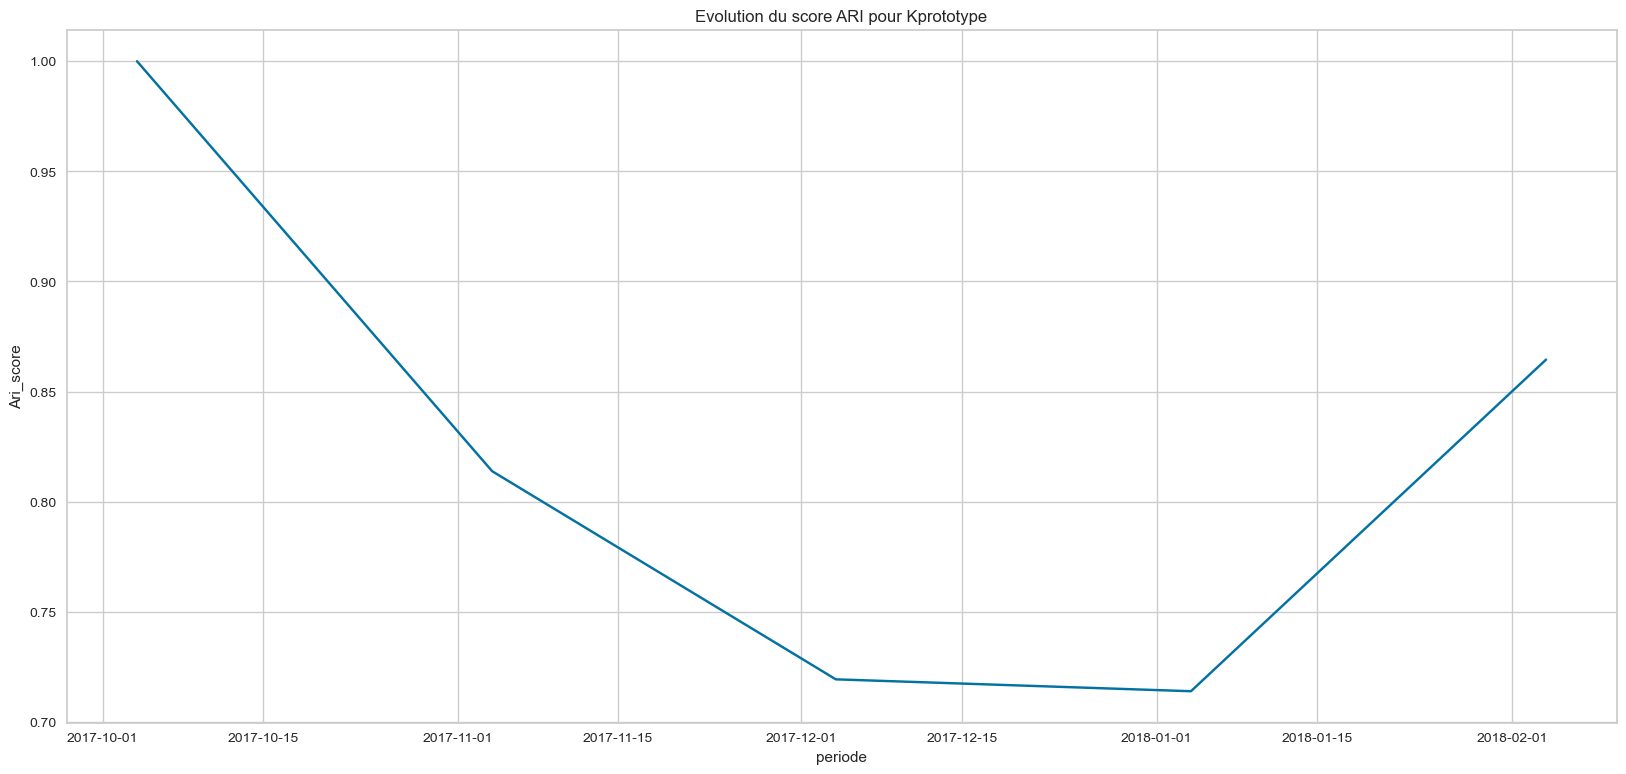

In [33]:
plt.figure(figsize=(20, 9))
sns.lineplot(data=df_maintenance_kprotoype, x='periode', y='Ari_score')
plt.title('Evolution du score ARI pour Kprototype')
plt.show()

Le score passe sous 0.75 après 1 mois et demi.